In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sklearn model for prediction of a boolean based on age and gender
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


data = pd.read_csv('data/train.csv')

data = data.dropna(subset=['Age', 'Sex', 'Survived'])
print(len(data))

# train/test split
train_data, test_data = train_test_split(data, test_size=0.3, random_state=1)
# make dummy data from sex column
train_data = pd.get_dummies(train_data, columns=['Sex', 'Pclass'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Pclass'])
print(len(train_data), len(test_data))
train_data.head()

714
499 215


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
641,642,1,"Sagesser, Mlle. Emma",24.0,0,0,PC 17477,69.3000,B35,C,True,False,True,False,False
433,434,0,"Kallio, Mr. Nikolai Erland",17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S,False,True,False,False,True
202,203,0,"Johanson, Mr. Jakob Alfred",34.0,0,0,3101264,6.4958,NaN,S,False,True,False,False,True
585,586,1,"Taussig, Miss. Ruth",18.0,0,2,110413,79.6500,E68,S,True,False,True,False,False
544,545,0,"Douglas, Mr. Walter Donald",50.0,1,0,PC 17761,106.4250,C86,C,False,True,True,False,False


In [42]:
numerical_data = train_data[['Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Sex_female']]
numerical_test_data = test_data[['Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Sex_female']]
train_rocs = []
test_rocs = []
for i in range(1, 15):
    regr = tree.DecisionTreeClassifier(max_depth=i)
    regr.fit(numerical_data.drop(['Survived'], axis=1), numerical_data['Survived'])
    train_predictions = regr.predict(numerical_data.drop('Survived', axis=1))
    train_rocs.append([i, metrics.roc_auc_score(numerical_data['Survived'], train_predictions)])
    test_predictions = regr.predict(numerical_test_data.drop('Survived', axis=1))
    test_rocs.append([i, metrics.roc_auc_score(numerical_test_data['Survived'], test_predictions)])
print(f'Train ROC per tree depth: {train_rocs}')
print(f'Test ROC per tree depth: {test_rocs}')
print(f'Best Train ROC is {max(train_rocs, key=lambda x: x[1])[1]} with depth {max(train_rocs, key=lambda x: x[1])[0]}')
print(f'Best Test ROC is {max(test_rocs, key=lambda x: x[1])[1]} with depth {max(test_rocs, key=lambda x: x[1])[0]}')

Train ROC per tree depth: [[1, 0.7672991255568387], [2, 0.7463042402243854], [3, 0.8167629104108233], [4, 0.8388962217455866], [5, 0.8537452565583237], [6, 0.8773882197657152], [7, 0.8955782874113184], [8, 0.9059231149975251], [9, 0.9243936644118131], [10, 0.9384672496287743], [11, 0.9534895231809932], [12, 0.9623906946048506], [13, 0.9641148325358851], [14, 0.9688995215311005]]
Test ROC per tree depth: [[1, 0.7574166206007001], [2, 0.7517965726920951], [3, 0.810392482034273], [4, 0.8230145568454026], [5, 0.8428229224249125], [6, 0.8119587248940483], [7, 0.8280357471899761], [8, 0.7994748479823106], [9, 0.8192832135618204], [10, 0.8032061912658928], [11, 0.8118205269946563], [12, 0.8217247097844114], [13, 0.824166206007002], [14, 0.8105306799336649]]
Best Train ROC is 0.9688995215311005 with depth 14
Best Test ROC is 0.8428229224249125 with depth 5


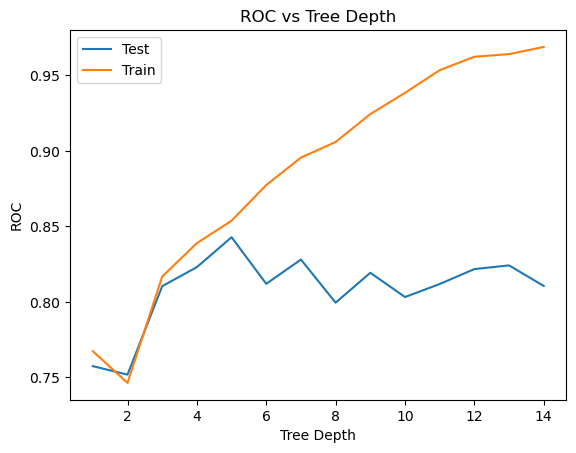

In [43]:
test_rocs_plot = pd.DataFrame(test_rocs, columns=['Depth', 'ROC'])
train_rocs_plot = pd.DataFrame(train_rocs, columns=['Depth', 'ROC'])
plt.plot(test_rocs_plot['Depth'], test_rocs_plot['ROC'])
plt.plot(train_rocs_plot['Depth'], train_rocs_plot['ROC'])
plt.legend(['Test', 'Train'])
plt.xlabel('Tree Depth')
plt.ylabel('ROC')
plt.title('ROC vs Tree Depth')
plt.show()

In [44]:
import graphviz

def plot_tree(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=['Survived', 'Did not survive'],  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

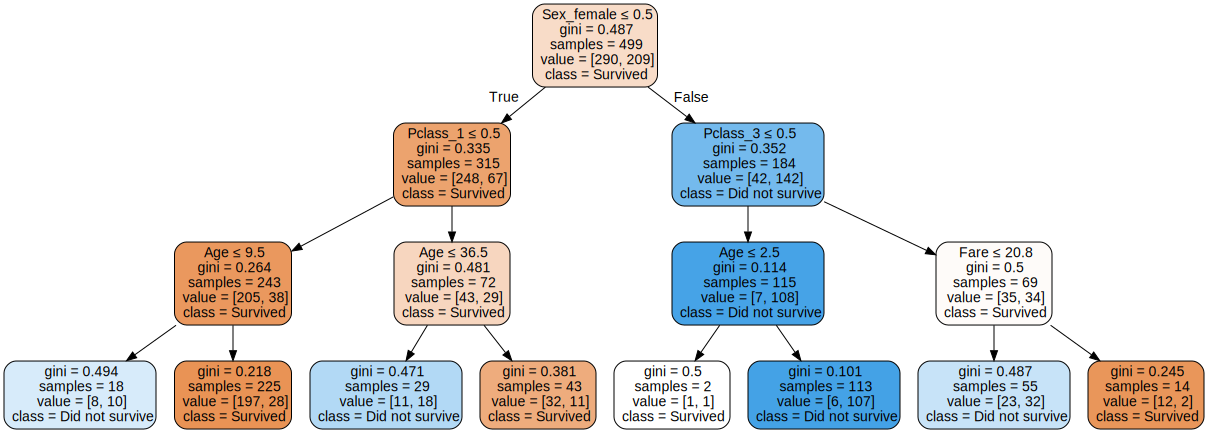

In [45]:
regr = tree.DecisionTreeClassifier(max_depth=3)
featuresModel1 = numerical_data.drop(['Survived'], axis=1).columns
regr.fit(numerical_data.drop(['Survived'], axis=1), numerical_data['Survived'])
plot_tree(regr, numerical_data.drop(['Survived'], axis=1).columns)